# Assignment 3. Logistic Regression
## Introduction
We're using the Titanic dataset (https://www.kaggle.com/heptapod/titanic) to predict how many passengers should have survived based on the parameters in the dataset using logistic regression.
## Step 1. Analyzing imports.

In [4]:
from sklearn import datasets
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns#; sns.set()
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

## Step 2. Preparing the data.
We're loading the dataset and dropping the unimportant variables (zeros, emabrkment port and passenger ID probably wouldn't play any role in the probability of survival).

In [121]:
df = pd.read_csv('train_and_test2.csv.')
df = df.drop(['zero', 'Passengerid', 'Embarked'], axis=1)
for i in range(1,19):
    df=df.drop('zero.'+str(i), axis=1)
y = df['2urvived'].values
df = df.drop(['2urvived'], axis=1)
X  = df.to_numpy()

## Step 3. Splitting the train and test sets.

In [122]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

## Step 4. Writing the function for the logical regression.

In [123]:
@ignore_warnings(category=ConvergenceWarning)
def solver_test(solver_type):
    logisticRegr = LogisticRegression(multi_class='auto', solver=solver_type, max_iter=100)
    logisticRegr.fit(x_train, y_train)
    score = logisticRegr.score(x_test, y_test)
    predictions = logisticRegr.predict(x_test)
    print(classification_report(y_test, predictions))
    cm = metrics.confusion_matrix(y_test, predictions)
    plt.figure(figsize=(10,10))
    sns.heatmap(cm, annot=True, linewidths=.5, fmt='d', square = True, cmap = 'Reds');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Accuracy Score: {0}'.format(score)
    plt.title(all_sample_title, size = 15);

##### The 0 and 1 labels on the confusion matrices correspond to 'not survived' and 'survived'.

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       488
           1       0.66      0.40      0.49       167

    accuracy                           0.79       655
   macro avg       0.74      0.66      0.68       655
weighted avg       0.78      0.79      0.77       655



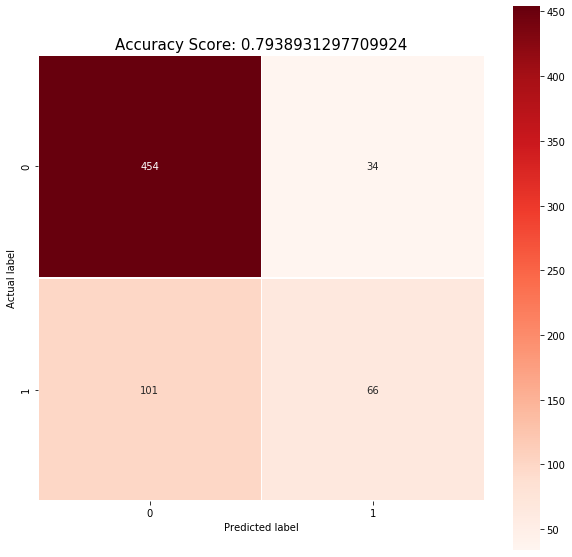

In [124]:
solver_test('lbfgs')

              precision    recall  f1-score   support

           0       0.75      0.98      0.85       488
           1       0.50      0.05      0.10       167

    accuracy                           0.75       655
   macro avg       0.63      0.52      0.47       655
weighted avg       0.69      0.75      0.66       655



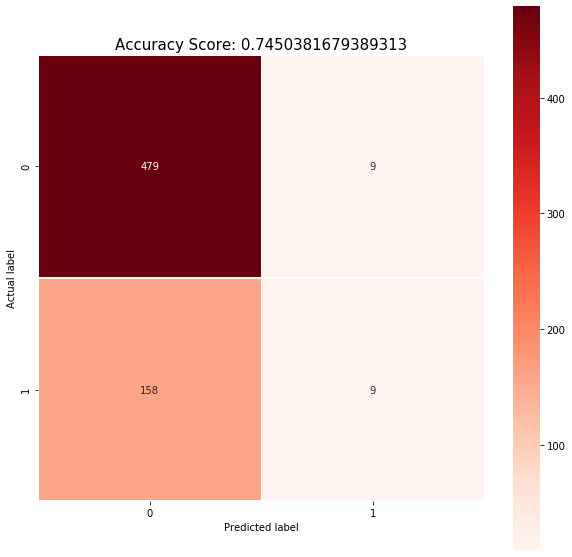

In [125]:
solver_test('saga')

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       488
           1       0.66      0.40      0.49       167

    accuracy                           0.79       655
   macro avg       0.74      0.66      0.68       655
weighted avg       0.78      0.79      0.77       655



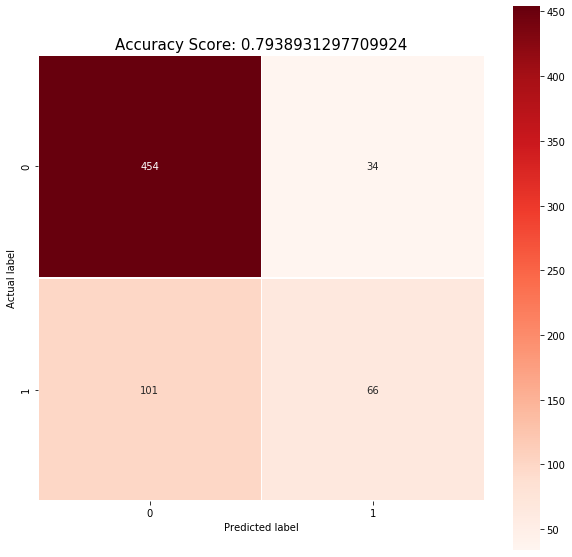

In [126]:
solver_test('newton-cg')

## Step 5. Conclusion.
As we can see, lbfgs and newton-cg provide the same results and saga provides a little bit different result. Saga actually has more true negatives (479 vs 454) and less false positives (9 vs 34) than the rest of the algorithms, so we could think that it is better at predicting the probability of death, but it has way more false positives (158 vs 101) and, what is the most important, way less true positives than lbfgs and newton-cg (9 vs 66). That affects the accuracy, the precision and the recall in a bad way and makes saga the worst algorithm of the three.
Overall the model is unsurprisingly far from perfect. There are far more variables that could have improved the model, but with these variables it is a good as it could get.